In [1]:
# Importing required libraries
!pip install opencv-python

import time
import io
import requests
from PIL import Image
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from pymongo import MongoClient
import matplotlib.pyplot as plt
import cv2
import os
import sys
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable


### Page display simulation

In [2]:
# Base URL of the site to be analyzed
SITE_URL = 'https://alianzaverde.org.co'

In [3]:
# Firefox web driver path
# Download the driver for you S.O. here: https://github.com/mozilla/geckodriver/releases
DRIVER_PATH = './geckodriver.exe'

In [4]:
# Creating a new firefox window
browser = webdriver.Firefox(executable_path = DRIVER_PATH)

/tmp/ipykernel_13154/1910320475.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Firefox(executable_path = DRIVER_PATH)


In [5]:
def make_request(browser,relative_path):
    # Making the request and rendering the browser
    browser.get(SITE_URL+relative_path)
    
    # Simulating vertical scrolling for handling lazy load
    check_height = browser.execute_script('return document.body.scrollHeight;')
    while True:
        browser.execute_script('window.scrollTo(0, document.body.scrollHeight);')
        time.sleep(5)
        height = browser.execute_script('return document.body.scrollHeight;')
        if height == check_height: 
            break 
        check_height = height
    
    # Getting HTML content and passing it to BeautifulSoup for scraping analysis
    return BeautifulSoup(browser.page_source, 'html.parser')

In [6]:
 soup = make_request(browser,'/lideres-verdes/congreso-2022/senado-2022')


### Extract and organize the information of each of the candidates

In [7]:
# Get HTML content for candidate listing page
soup = make_request(browser,'/lideres-verdes/congreso-2022/senado-2022')
# Find the section where the data of each of the candidates is contained 
candidates = soup.find_all(class_ = 'sppb-col-md-3')
print(len(candidates))        

36


In [8]:
ruta = os.path.join(os.getcwd(),'Imagenes')

In [61]:
# Building a list with the url of the photo, the description and social networks of each of the candidates
news = []
socialmedia = []
descripciones = []
i = 0
for candidate in candidates:
    i+=1
    socialMediaLinks = ''
    if candidate.find(class_ = 'sppb-addon-wrapper')!= None:
        if candidate.find('ul',class_ = 'sppb-person-social')!= None:
            socialmedia = candidate.find('ul',class_ = 'sppb-person-social').find_all('li')
            for x in socialmedia:
                socialMediaLinks = socialMediaLinks+' ---- '+ x.find('a')['href']
            news.append({ 
            'Candidate number': i ,
            'Description': candidate.find(class_ = 'person-content-hover-content-wrap').find('span').get_text(),
            'Social media': socialMediaLinks
            })
            url_img = 'https://alianzaverde.org.co/'+format (candidate.find('div',class_ = 'sppb-person-image').find(class_='sppb-img-responsive').get('src'))
            r = requests.get(url_img)
            file = io.BytesIO(r.content)
            img = Image.open(file)
            img.save("../ParcialSegundoCorte-BigData/Imagenes/"+str(i)+".jpg")
            
            descripciones.append(candidate.find(class_ = 'person-content-hover-content-wrap').find('span').get_text())
            
        else:
            news.append({
            'Candidate number': i ,
            'Description': candidate.find(class_ = 'person-content-hover-content-wrap').find('span').get_text(),
            'Social media': 'Does not have'
            })
            url_img = 'https://alianzaverde.org.co/'+format (candidate.find('div',class_ = 'sppb-person-image').find(class_='sppb-img-responsive').get('src'))
            r = requests.get(url_img)
            file = io.BytesIO(r.content)
            img = Image.open(file)
            img.save("../ParcialSegundoCorte-BigData/Imagenes/"+str(i)+".jpg")
            descripciones.append(candidate.find(class_ = 'person-content-hover-content-wrap').find('span').get_text())
        

In [82]:
archivos = os.listdir(ruta)
img_array = []
for x in range(1, len(archivos)):
    nuevo = str(ruta) + "/"+str(x)+".jpg"
    #Cargar la imagen con openCV
    imgBGR = cv2.imread(nuevo)
    #Cambiar esacio de color BGR a RGB
    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    #Arreglo con la informacion de las imagenes leidas
    img_array.append(imgRGB)

/home/landrux/Documents/UNBOSQUE/Examen 2/ParcialSegundoCorte-BigData/Imagenes/1.jpg
/home/landrux/Documents/UNBOSQUE/Examen 2/ParcialSegundoCorte-BigData/Imagenes/2.jpg
/home/landrux/Documents/UNBOSQUE/Examen 2/ParcialSegundoCorte-BigData/Imagenes/3.jpg
/home/landrux/Documents/UNBOSQUE/Examen 2/ParcialSegundoCorte-BigData/Imagenes/4.jpg
/home/landrux/Documents/UNBOSQUE/Examen 2/ParcialSegundoCorte-BigData/Imagenes/5.jpg
/home/landrux/Documents/UNBOSQUE/Examen 2/ParcialSegundoCorte-BigData/Imagenes/6.jpg
/home/landrux/Documents/UNBOSQUE/Examen 2/ParcialSegundoCorte-BigData/Imagenes/7.jpg
/home/landrux/Documents/UNBOSQUE/Examen 2/ParcialSegundoCorte-BigData/Imagenes/8.jpg
/home/landrux/Documents/UNBOSQUE/Examen 2/ParcialSegundoCorte-BigData/Imagenes/9.jpg
/home/landrux/Documents/UNBOSQUE/Examen 2/ParcialSegundoCorte-BigData/Imagenes/10.jpg
/home/landrux/Documents/UNBOSQUE/Examen 2/ParcialSegundoCorte-BigData/Imagenes/11.jpg
/home/landrux/Documents/UNBOSQUE/Examen 2/ParcialSegundoCorte-B

{'Candidate number': 2, 'Description': 'Nacida de seres excepcionales, en tiempos inciertos; es la mujer de retos resueltos. Desde el inicio de su carrera política, su liderazgo se enfoca en mantener la cultura de la equidad, la familia y el fortalecimiento económico, político y social de las regiones en Colombia', 'Social media': ' ---- https://www.facebook.com/sandraortizsenadora ---- https://twitter.com/sandraortizn ---- https://www.youtube.com/channel/UCTwjhE_bLZS72l0RqI_u4OQ/featured ---- https://www.instagram.com/sandraortizn'}


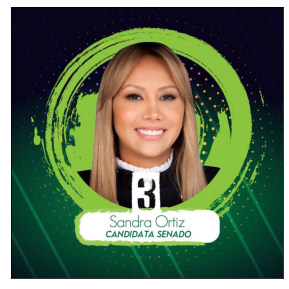

In [86]:
fig1 = plt.figure(1)
#Ocultar valores numericos de los ejes
plt.xticks([])
plt.yticks([])
#tamaño de imagen
fig1.set_size_inches(5, 5)
plt.imshow(img_array[1])
print (news[1])

In [66]:
print (ruta)

/home/landrux/Documents/UNBOSQUE/Examen 2/ParcialSegundoCorte-BigData/Imagenes


In [75]:
nuevo = str(ruta) + "/"+str(1)+".jpg"
nuevo2 = "\'"+ nuevo + "\'"
nuevo2

"'/home/landrux/Documents/UNBOSQUE/Examen 2/ParcialSegundoCorte-BigData/Imagenes/1.jpg'"

In [ ]:

    dirArchivo = ruta +"/"+ archivos[x]